In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [9]:
ch_visited = []
ch_relaxed = []
chase_visited = []
chase_relaxed = []
ch_time = []
chase_time = []
length = []

with open('logs/log_27-07-2022 17-58-33.txt', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        if int(row[0]) == 1:
            length.append(int(row[1]))
            ch_relaxed.append(int(row[3]))
            chase_relaxed.append(int(row[4]))
            ch_visited.append(int(row[5]))
            chase_visited.append(int(row[6]))
            ch_time.append(float(row[7]))
            chase_time.append(float(row[8]))
print(len(length))

500000


In [10]:
v_ch = np.mean(ch_visited)
v_chase = np.mean(chase_visited)
r_ch = np.mean(ch_relaxed)
r_chase = np.mean(chase_relaxed)
t_ch = np.mean(ch_time)
t_chase = np.mean(chase_time)

500000 runs: avg path time (ms) = 11494320.26215
chase: 160.710014 edges visited, 29.240558 edges relaxed on avg.
   ch: 1413.350354 edges visited, 349.859248 edge relaxed on avg.


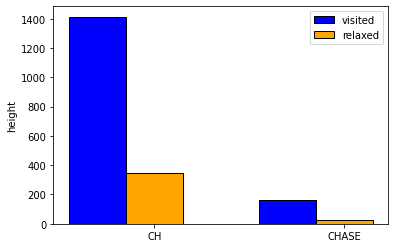

In [20]:
barWidth = 0.3

bars1 = [v_ch, v_chase]
bars2 = [r_ch, r_chase]
 
# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Create blue bars
plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='visited')
 
# Create cyan bars
plt.bar(r2, bars2, width = barWidth, color = 'orange', edgecolor = 'black', capsize=7, label='relaxed')

# plt.bar(r3, bars3, width = barWidth, color = 'green', edgecolor = 'black', capsize=7, label='relaxed')
 
# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], ['CH', 'CHASE'])
plt.ylabel('height')
plt.legend()
 
# Show graphic
print(len(length), "runs:", "avg path time (ms) =", np.mean(length))
print("chase:", v_chase, "edges visited,", r_chase, "edges relaxed on avg.")
print("   ch:", v_ch, "edges visited,", r_ch, "edge relaxed on avg.")
plt.show()

500000 runs: avg path time (ms) = 11494320.26215


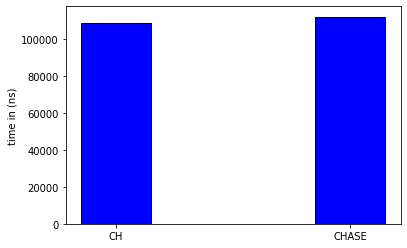

In [14]:
barWidth = 0.3

bars1 = [t_ch, t_chase]
 
# The x position of bars
r1 = np.arange(len(bars1))
 
# Create blue bars
plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7)
 
plt.xticks([r for r in range(len(bars1))], ['CH', 'CHASE'])
plt.ylabel('time in (ns)')
 
# Show graphic
print(len(length), "runs:", "avg path time (ms) =", np.mean(length))
plt.show()